<a href="https://colab.research.google.com/github/segravjf/python_practice/blob/main/sales_by_marketing_channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales by marketing channel

Given the following [data set](https://docs.google.com/spreadsheets/d/1s_gYPvxtgO9ufb-q2TO4n9_TCe7I-RorkbDYYegMm4c/edit#gid=33674467), can you plot a chart that shows the percent of revenue by marketing source?



You can assume that purchase_value is revenue in this case, and you'll have to calculate the percent of revenue by source prior to plotting.



The solution for premium users will be provided using python.



In [1]:
## Import some modules
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
## Import data from gsheets
## I had to make my own copy of the doc and then publish it to the web as a CSV
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRFI7Kn4AccgTBON7imjTWD4CM1MrbaEv7prJhpalPxCBrO2EfYTWRkyTAhUzxBYEfNUkcVBIYzUxbr/pub?output=csv',
                 index_col=0
)

df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
user_id,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
## Look at datatypes
df.dtypes

signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [8]:
## Tweak the times to be timestamp
df['purchase_dtime'] = pd.to_datetime(df['purchase_time'], format= '%Y-%m-%d %H:%M:%S')
df['signup_dtime'] = pd.to_datetime(df['signup_time'], format= '%Y-%m-%d %H:%M:%S')

df.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_dtime,signup_dtime
user_id,,,,,,,,,,,,
22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2015-04-18 02:47:11,2015-02-24 22:55:49
333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,2015-06-08 01:38:54,2015-06-07 20:39:50
1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2015-01-01 18:52:45,2015-01-01 18:52:44
150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,2015-05-04 13:54:50,2015-04-28 21:13:25
221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,2015-09-09 18:40:53,2015-07-21 07:09:52


In [10]:
## Quickly check for duplicate orders
unique_orders = df.groupby(['user_id','purchase_dtime'])['purchase_value'].count().reset_index()

unique_orders.sort_values(by='purchase_value',ascending=False)

,user_id,purchase_dtime,purchase_value
0,4,2015-09-26 21:32:16,1
40734,267004,2015-03-17 12:28:10,1
40722,266959,2015-05-12 15:18:39,1
40723,266960,2015-05-10 14:52:14,1
40724,266969,2015-06-04 02:36:47,1
...,...,...,...
20370,134177,2015-09-01 11:03:54,1
20371,134181,2015-03-06 08:21:05,1
20372,134182,2015-02-09 22:18:42,1
20373,134190,2015-09-13 16:00:10,1


In [14]:
## Ok, we are good on order duplicates
## Now let's summarize up by marketing channel and calculate a percentage
by_sales = df.groupby(['source'])['purchase_value'].sum().reset_index()

total_sales = sum(by_sales['purchase_value'])
by_sales['pct_of_sales'] = by_sales['purchase_value'] * 100. / total_sales

by_sales.head()

,source,purchase_value,pct_of_sales
0,Ads,889934,39.450402
1,Direct,459174,20.354991
2,SEO,906722,40.194607


<Axes: xlabel='pct_of_sales', ylabel='source'>

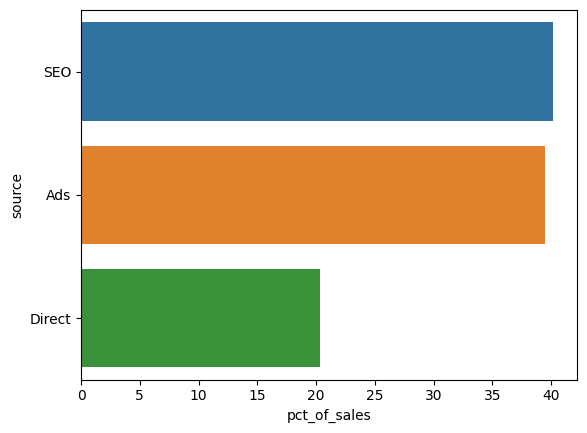

In [17]:
## Finally, let's do a quick plot
sns.barplot(x = 'pct_of_sales', y = 'source', data=by_sales.sort_values(by='pct_of_sales',ascending=False))